In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-images/haarcascade.xml
/kaggle/input/prediction-images/cell1.png
/kaggle/input/prediction-images/dandelion1.jpg
/kaggle/input/prediction-images/rose.jpg
/kaggle/input/prediction-images/322868_1100-1100x628.jpg
/kaggle/input/prediction-images/daisy.jpg
/kaggle/input/prediction-images/haarcascade_frontalface_default.xml
/kaggle/input/prediction-images/Malaria-Parasite-Detection-Using-an-SVM-output-5-0 (2).png
/kaggle/input/prediction-images/sunflower.jpg
/kaggle/input/prediction-images/d41586-020-01430-5_17977552.jpg
/kaggle/input/prediction-images/dandelion.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_225.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_419.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_269.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_86.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_707.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_163.jpg
/kaggle/input/drowsiness-dataset/train/Closed/_19.jpg
/kaggle/input/drowsiness-

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2


In [3]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [4]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

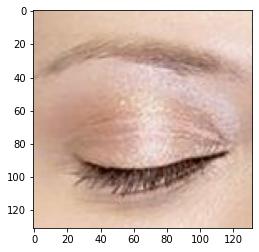

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [6]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")

In [7]:
a.shape

(480, 640, 3)

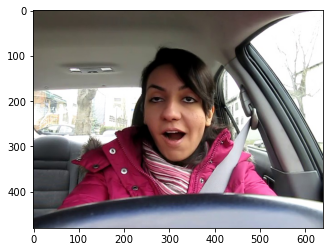

In [8]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/5.jpg"))

In [9]:
def face_for_yawn(direc="../input/drowsiness-dataset/train", face_cas_path="../input/prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [10]:
def get_data(dir_path="../input/drowsiness-dataset/train/", face_cas="../input/prediction-images/haarcascade_frontalface_default.xml", eye_cas="../input/prediction-images/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [11]:
data_train = get_data()

2
3


In [12]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [13]:
new_data = append_data()

0
1
2
3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [14]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [15]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [17]:
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [19]:
len(X_test)

578

In [20]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [21]:
tf.__version__


import keras
keras.__version__

'2.4.3'

In [22]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [23]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

In [24]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 11s 179ms/step - loss: 1.2405 - accuracy: 0.4389 - val_loss: 0.8663 - val_accuracy: 0.6920
Epoch 2/50
43/43 [==============================] - 6s 146ms/step - loss: 0.5257 - accuracy: 0.7950 - val_loss: 0.4072 - val_accuracy: 0.8426
Epoch 3/50
43/43 [==============================] - 7s 151ms/step - loss: 0.3757 - accuracy: 0.8423 - val_loss: 0.3245 - val_accuracy: 0.8824
Epoch 4/50
43/43 [==============================] - 6s 149ms/step - loss: 0.3704 - accuracy: 0.8524 - val_loss: 0.2924 - val_accuracy: 0.9014
Epoch 5/50
43/43 [==============================] - 6s 146ms/step - loss: 0.2975 - accuracy: 0.8784 - val_loss: 0.2310 - val_accuracy: 0.9083
Epoch 6/50
43/43 [==============================] - 7s 166ms/step - loss: 0.3365 - accuracy: 0.8593 - val_loss: 0.2516 - val_accuracy: 0.9048
Epoch 7/50
43/43 [==============================] - 6s 146ms/step - loss: 0.2887 - accuracy: 0.8784 - val_loss: 0.2305 - val_accuracy: 0.9152
Epoch

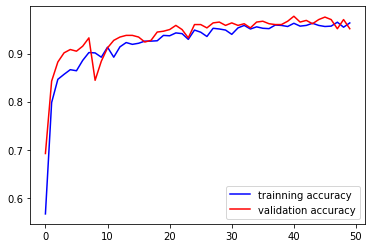

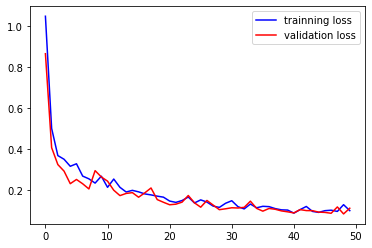

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [26]:
model.save("drowiness_new6.h5")

In [27]:
model.save("drowiness_new6.model")

In [28]:
prediction = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 0, 2, 3, 3,
       2, 1, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 0, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 1,
       3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 3, 2, 1, 3, 3,
       1, 3, 1, 2, 3, 3, 3, 1, 2, 2, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 1, 2, 3, 1, 2, 1, 3, 3, 3, 1, 2, 0, 1, 3, 2, 2, 3, 2, 3, 0,
       3, 2, 3, 1, 2, 0, 0, 1, 2, 3, 2, 1, 3, 0, 2, 2, 2, 2, 1, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3, 3, 1, 3, 3, 1, 3, 3, 1, 0,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 3, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 1, 2, 2, 1, 3, 2, 3, 1,

In [30]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [31]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.95      0.67      0.79        63
     no_yawn       0.77      0.97      0.86        74
      Closed       0.97      0.94      0.96       215
        Open       0.95      0.97      0.96       226

    accuracy                           0.93       578
   macro avg       0.91      0.89      0.89       578
weighted avg       0.93      0.93      0.93       578



In [32]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

In [33]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
np.argmax(prediction)

1

In [34]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(prediction)

2

In [35]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
np.argmax(prediction)

3

In [36]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(prediction)

3

In [37]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_100.jpg")])
np.argmax(prediction)

2

In [38]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1006.jpg")])
np.argmax(prediction)

2

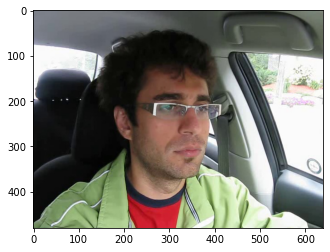

In [39]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/no_yawn/1006.jpg"))